In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,10)


In [2]:
infile='ConCrop_JULES_drive_data.nc'
inf=nc.Dataset(infile,'a')
inf.variables['precip'].missing_value=-9999.

In [3]:
Data_Dict={}
for var in inf.variables:
    Data_Dict[var]=inf.variables[var][:].squeeze()

del Data_Dict['x']
del Data_Dict['time']

Data_Dict['precip']=Data_Dict['precip'].data
Data_Dict['precip'][Data_Dict['precip']<0]=0
Data_Dict['precip']/=1800.

Data_Dict['pstar']*=1e6
Data_Dict['pstar'][Data_Dict['pstar']<0]=-9999.

Data_Dict['q']=Data_Dict['q'].data
Data_Dict['wind']=Data_Dict['wind'].data

Data_Dict['sw_down'][Data_Dict['sw_down']<0]=0.

In [4]:
for var in Data_Dict:
    print(var)
    index=np.where(Data_Dict[var]==-9999.)[0]
    inc=-48
    count=1.
    sign=1
    while len(index)>0:
        print(inc,count,sign)
        Data_Dict[var][index]=Data_Dict[var][index+inc]
        index=np.where(Data_Dict[var]==-9999.)[0]
        inc*=int(np.floor(count)*sign)
        count+=0.5
        sign=0-sign
        
        

t
precip
wind
-48 1.0 1
-48 1.5 -1
48 2.0 1
96 2.5 -1
-192 3.0 1
-576 3.5 -1
1728 4.0 1
q
-48 1.0 1
-48 1.5 -1
48 2.0 1
96 2.5 -1
-192 3.0 1
-576 3.5 -1
1728 4.0 1
pstar
-48 1.0 1
-48 1.5 -1
48 2.0 1
96 2.5 -1
-192 3.0 1
-576 3.5 -1
1728 4.0 1
sw_down
lw_down


In [5]:
time_index=nc.num2date(inf.variables['time'][:],inf.variables['time'].units)

In [6]:
DataFrame=pd.DataFrame(Data_Dict,index=time_index)

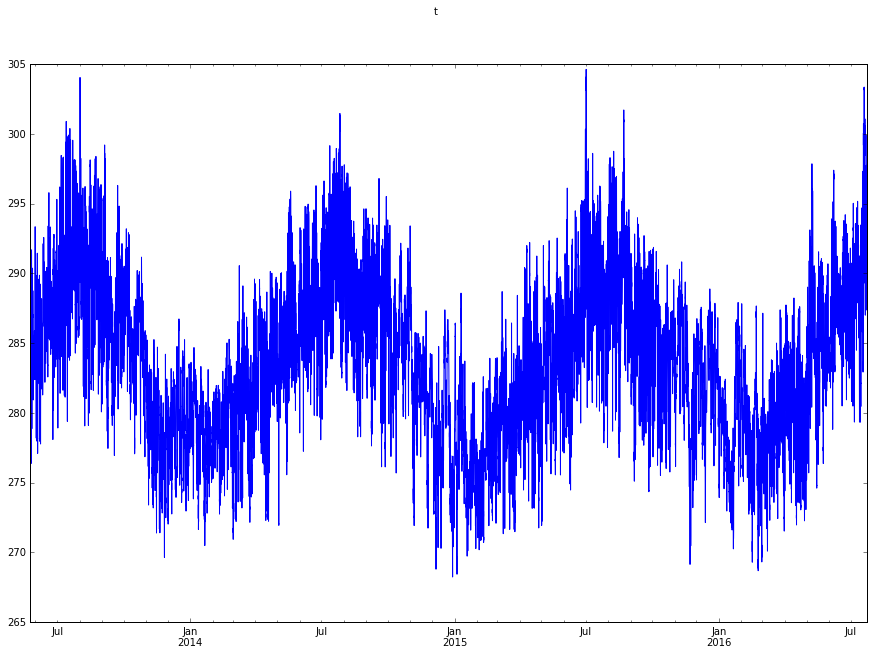

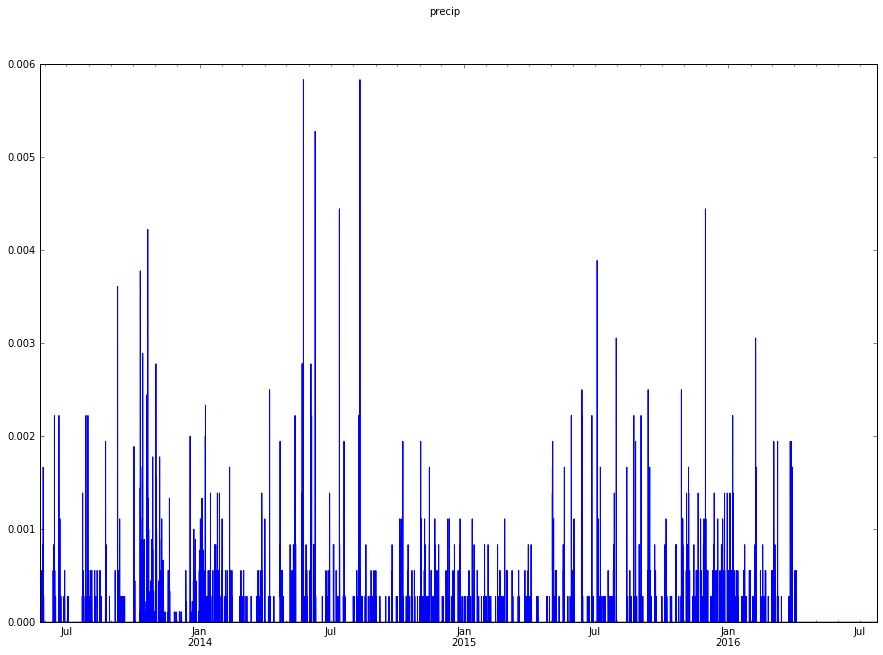

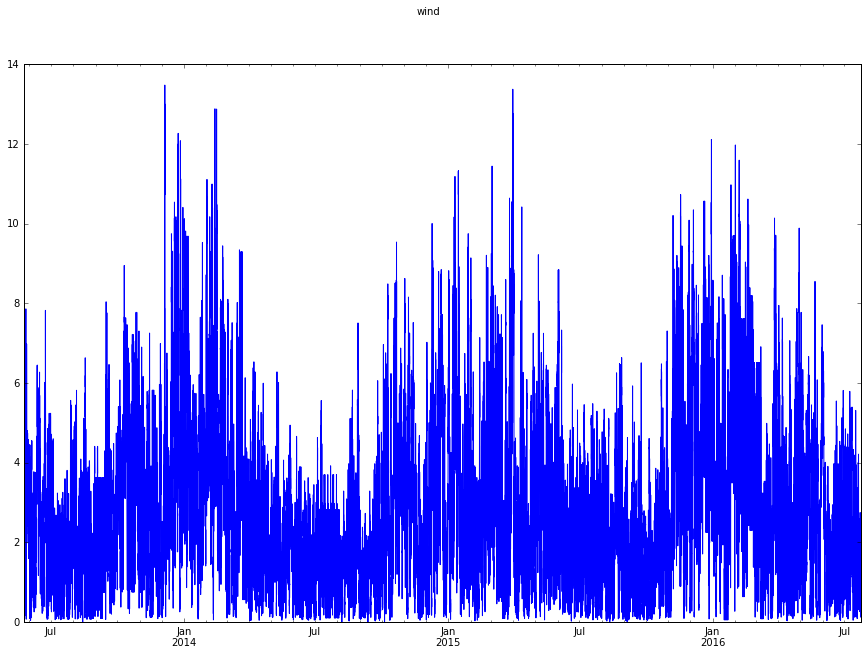

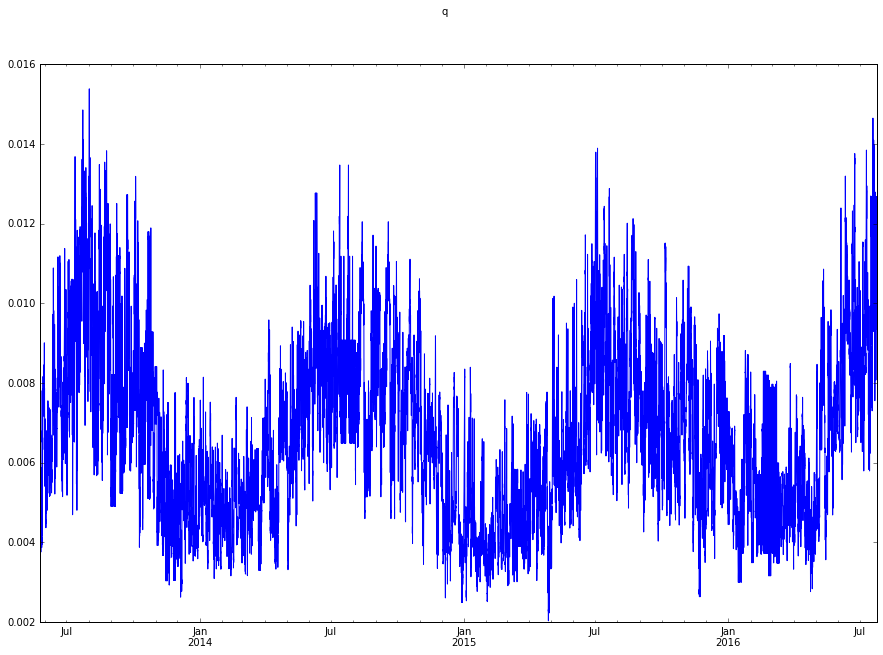

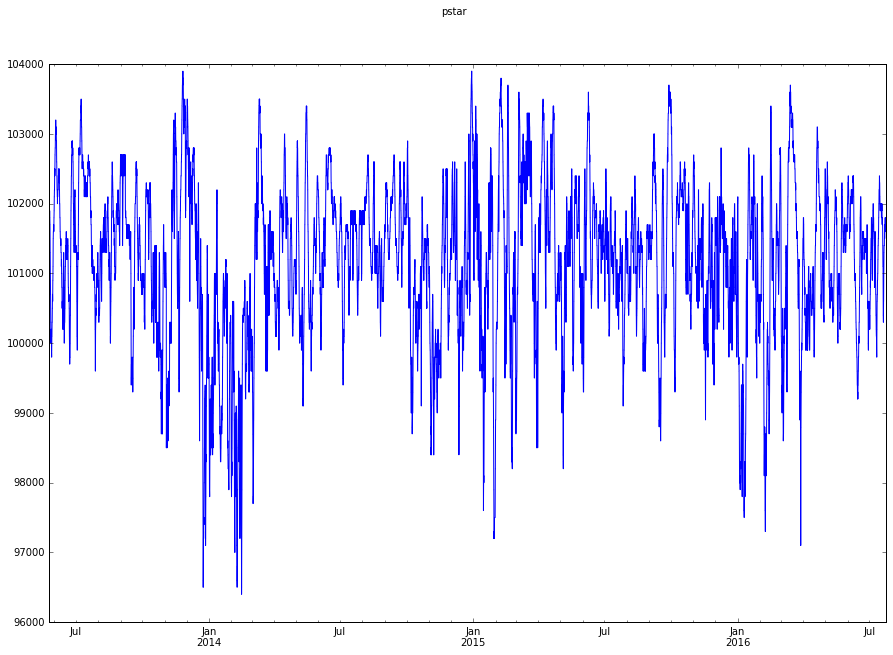

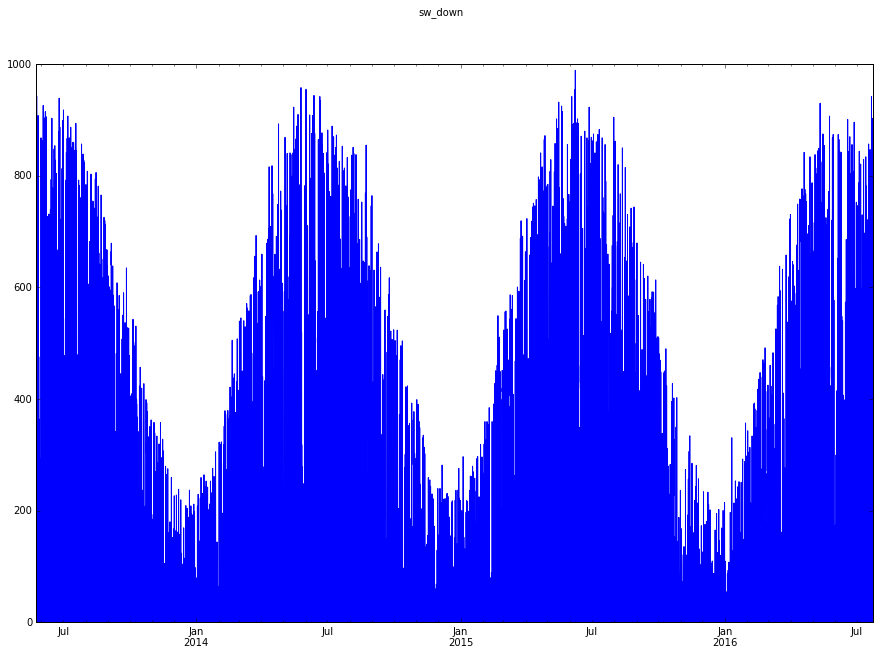

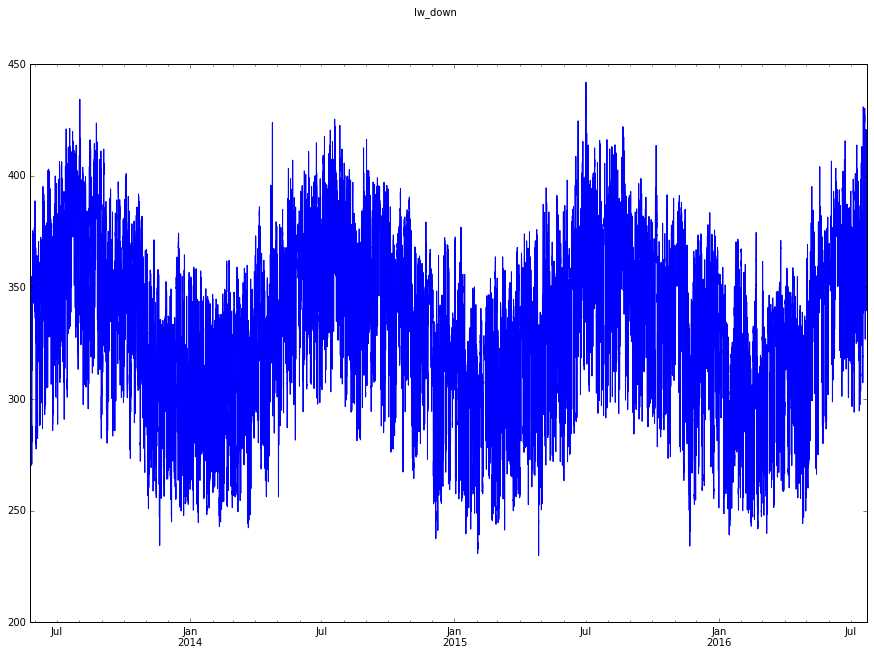

In [7]:
for var in Data_Dict:
    fig,ax=plt.subplots(ncols=1,nrows=1)
    DataFrame[var].plot(ax=ax)#[:100].plot(ylim=[0,5])
    fig.suptitle(var)

In [8]:
for var in Data_Dict:
    inf.variables[var][:]=Data_Dict[var]



In [9]:
inf.close()
